# Predicting Congenital Disorder using Support Vector Machines
https://www.kaggle.com/c/ga-dat-syd13/data

Author: <div class="LI-profile-badge"  data-version="v1" data-size="medium" data-locale="en_US" data-type="horizontal" data-theme="dark" data-vanity="aroraaman"><a class="LI-simple-link" href='https://au.linkedin.com/in/aroraaman?trk=profile-badge'>Aman Arora</a></div>  

**So, What is a congenital disorder?** <br> 
Most babies are born healthy, but when a baby has a condition that is present from birth, it is called a congenital disorder. Congenital disorders can be inherited or caused by environmental factors and their impact on a child’s health and development can vary from mild to severe. A child with a congenital disorder may experience a disability or health problems throughout life. (https://www.pregnancybirthbaby.org.au/what-is-a-congenital-disorder)

**Here are some of the resources that I referenced before creating this notebook:**<br>
1. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python 
2. General Assembly, Sydney - Linear Regression iPython Notebook -
Authors: Kevin Markham (Washington, D.C.), Ed Podojil (New York City); <br>
Taught by: **Dima Galat** (https://www.linkedin.com/in/dimagalat/)
5. https://www.booktopia.com.au/multivariate-data-analysis-joe-f-hair/prod9781292021904.html?source=pla&gclid=EAIaIQobChMIpJ2qkJLO3QIV16mWCh3RBAFUEAQYASABEgL39vD_BwE (MultiVariate Data Analysis)
6. https://www-bcf.usc.edu/~gareth/ISL/ Introduction to Statistical Learning (James et al., 2014)
7. https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda
8. https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
9. https://www.kaggle.com/apapiu/regularized-linear-models

### Importing Libraries

In [1]:
#Getting the toolkit together
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.preprocessing import StandardScaler
plt.style.use("fivethirtyeight")
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,\
                            roc_curve,roc_auc_score,classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn import metrics
import statsmodels.api as sm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Data EDA

I performed initial EDA for this data set in my notebook 'Predicting Congenital Disorder using Resampling.ipynb'. Therefore, here I will just clean my data - remove nulls and implement Support Vector Machine model.

In [2]:
#importing data
train_path = '/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/health-diagnostics-train.csv'
health_df =pd.read_csv(train_path)

# importing data
test_path = '/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/health-diagnostics-test.csv'
health_df_test =pd.read_csv(test_path)

In [3]:
health_df.replace('#NULL!', np.NaN, inplace = True)
health_df_test.replace('#NULL!', np.NaN, inplace = True)

In [4]:
for col in health_df.columns[:-1]:
    health_df[col] = health_df[col].astype(float, errors = 'raise')
    
for col in health_df_test.columns:
    health_df_test[col] = health_df_test[col].astype(float, errors = 'raise')

I have tried different combinations of imputing data and dropping data already while working on this exercise. It makes sense to impute the mode() in missing values as these are categorical features. However, imputing in test with mode() and dropping train values gives maximum accuracy. <br>
Why? Well, first of all we have over 30,000 values in train data. Losing 900 is approx 3% of the data. This data is not unique and exists for target == 0, that is, our majority class. We are not missing the minority class, therefore, it is safe to drop this data in Train. For our test data, we cannot drop any data and therefore, we will be imputing with mode(). 

In [5]:
health_df.dropna(inplace = True)
health_df_test = health_df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

**TRAIN TEST SPLIT**

In [6]:
X = health_df.loc[:, health_df.columns != 'target']
y = health_df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state = 123)

In [8]:
X_train.shape

(15217, 9)

In [9]:
X_test.shape

(15218, 9)

### Implementing Logistic Regression

In [10]:
target_count = pd.Series(y_train).value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of majority to minority class:', round(target_count[0] / target_count[1], 2), ': 1')

prop = round(target_count[0] / target_count[1],2)

Class 0: 15188
Class 1: 29
Proportion of majority to minority class: 523.72 : 1


In [11]:
result = sm.Logit(y_train, X_train).fit()

print (result.summary())

Optimization terminated successfully.
         Current function value: 0.011659
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                15217
Model:                          Logit   Df Residuals:                    15208
Method:                           MLE   Df Model:                            8
Date:                Thu, 11 Oct 2018   Pseudo R-squ.:                  0.1575
Time:                        01:30:54   Log-Likelihood:                -177.42
converged:                       True   LL-Null:                       -210.60
                                        LLR p-value:                 2.601e-11
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
income              -1.3586      0.161     -8.459      0.000      -1.673      -1.044
maternal  

[0.0008546046670380746]
the recall for this model is : 0.7
TP 21
TN 10629
FP 4559
FN 9
AUC: 0.6999144061100869
PRECISION: 0.004585152838427947
TPR: 0.7
TNR: 0.6998288122201738
ACC: 0.6998291496911552
wtACC: 0.699948643666052
G_mean: 0.6999144008763655
----------------------------------------------------------------------------------------------------
AUC score: 0.7504894214730927 for model: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x111970160>


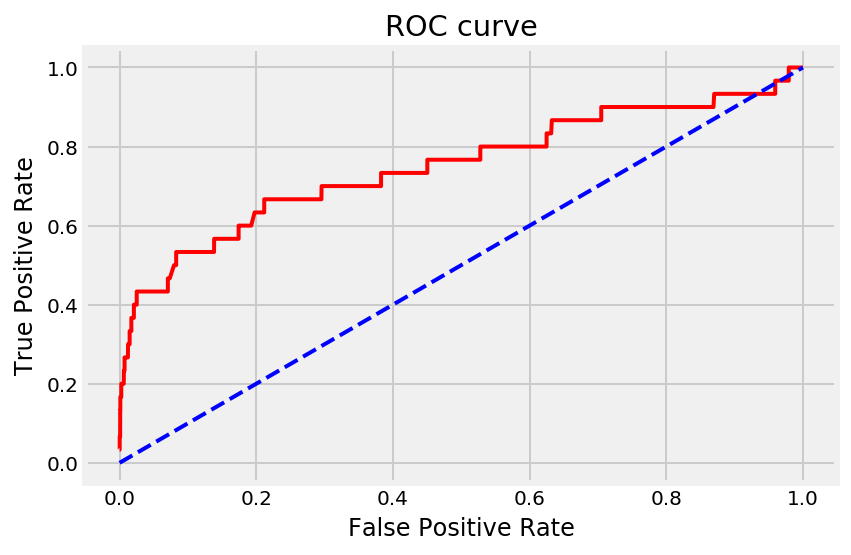

In [12]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']) 


y_pred = result.predict(X_test)
threshold = Find_Optimal_Cutoff(y_test, y_pred)
print(threshold)

y_pred_class = np.where(y_pred >= threshold, 1, 0) 

cnf_matrix = confusion_matrix(y_test, y_pred_class)
TP = cnf_matrix[1,1,]
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
ACC = (TP+TN)/(TP+TN+FP+FN)
wtACC = (0.7*TPR) + (0.3*TNR)
prec = TP/(TP+FP)
G_mean = np.sqrt(TPR * TNR)
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",TP) 
print("TN",TN) 
print("FP",FP) 
print("FN",FN) 
print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
print('PRECISION:',prec)
print('TPR:',TPR)
print('TNR:',TNR)
print('ACC:',ACC)
print('wtACC:',wtACC)
print('G_mean:',G_mean)
print('-'*100)

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print('AUC score:', auc_score, 'for model:',result)
plt.figure()
plt.plot(fpr, tpr, color='red',
lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### Implementing Quadratic Discriminant Analysis

the recall for this model is : 0.7
TP 21
TN 14909
FP 279
FN 9
AUC: 0.8408151171977878
PRECISION: 0.07
TPR: 0.7
TNR: 0.9816302343955755
ACC: 0.9810750427125772
wtACC: 0.7844890703186727
G_mean: 0.8289397831428426
----------------------------------------------------------------------------------------------------
AUC score: 0.7504894214730927 for model: QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)


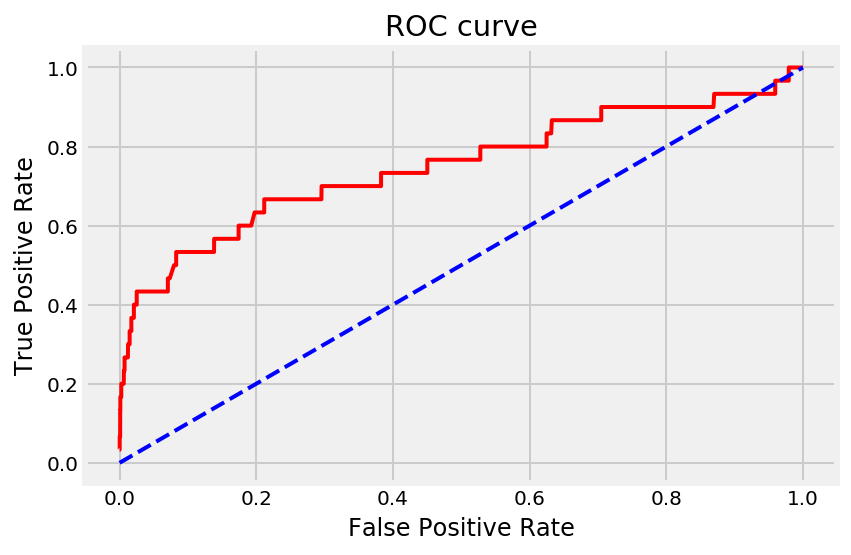

In [13]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X,y)

y_pred_class = qda.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_class)
TP = cnf_matrix[1,1,]
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
ACC = (TP+TN)/(TP+TN+FP+FN)
wtACC = (0.7*TPR) + (0.3*TNR)
prec = TP/(TP+FP)
G_mean = np.sqrt(TPR * TNR)
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",TP) 
print("TN",TN) 
print("FP",FP) 
print("FN",FN) 
print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
print('PRECISION:',prec)
print('TPR:',TPR)
print('TNR:',TNR)
print('ACC:',ACC)
print('wtACC:',wtACC)
print('G_mean:',G_mean)
print('-'*100)

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print('AUC score:', auc_score, 'for model:',qda)
plt.figure()
plt.plot(fpr, tpr, color='red',
lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()